In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Le a FRE do SuperDove
SD_fre = pd.read_excel("Superdove1.xlsx", index_col=0)

In [15]:
#tabela de radiometria 
radiometria = pd.read_excel('rrs_mediana.xlsx', index_col='estacoes_id')

#arruma indice
radiometria = radiometria.transpose().set_index(pd.Index(range(400,900))).transpose()

In [16]:
radiometria

,400,401,402,403,404,405,406,407,408,409,...,890,891,892,893,894,895,896,897,898,899
estacoes_id,,,,,,,,,,,,,,,,,,,,,
Billings_07_21_Ponto_01,0.002806,0.002756,0.002748,0.002805,0.002784,0.002769,0.002778,0.002787,0.002791,0.002790,...,0.000689,0.000681,0.000673,0.000666,0.000662,0.000658,0.000655,0.000640,0.000623,0.000607
Billings_07_21_Ponto_01R1,0.002380,0.002331,0.002327,0.002386,0.002365,0.002352,0.002364,0.002373,0.002377,0.002374,...,0.000688,0.000675,0.000661,0.000649,0.000645,0.000642,0.000639,0.000642,0.000643,0.000642
Billings_07_21_Ponto_01R2,0.002090,0.002040,0.002040,0.002101,0.002079,0.002066,0.002082,0.002092,0.002096,0.002093,...,0.000704,0.000696,0.000688,0.000680,0.000680,0.000674,0.000667,0.000671,0.000667,0.000657
Billings_07_21_Ponto_02,0.002790,0.002738,0.002729,0.002786,0.002761,0.002743,0.002749,0.002755,0.002757,0.002753,...,0.000734,0.000722,0.000710,0.000698,0.000691,0.000694,0.000691,0.000690,0.000682,0.000680
Billings_07_21_Ponto_03,0.002411,0.002363,0.002357,0.002413,0.002393,0.002381,0.002393,0.002402,0.002404,0.002402,...,0.000730,0.000725,0.000720,0.000713,0.000702,0.000690,0.000679,0.000683,0.000685,0.000688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Billings_07_21_Ponto_V02,0.004774,0.004653,0.004620,0.004710,0.004632,0.004571,0.004564,0.004549,0.004523,0.004485,...,0.004155,0.004129,0.004114,0.004089,0.004040,0.003993,0.003954,0.003949,0.003932,0.003915
Billings_07_21_Ponto_V03,0.003284,0.003191,0.003170,0.003240,0.003185,0.003142,0.003140,0.003130,0.003110,0.003081,...,0.003198,0.003180,0.003161,0.003136,0.003105,0.003086,0.003066,0.003033,0.002987,0.002947
Billings_07_21_Ponto_V04,0.002807,0.002741,0.002736,0.002807,0.002772,0.002746,0.002755,0.002760,0.002759,0.002750,...,0.001111,0.001094,0.001076,0.001063,0.001070,0.001078,0.001087,0.001057,0.001020,0.000982


In [5]:
#Cria uma lista de bandas
lista_bandas1 = [441, 490, 531, 565, 610, 666,  705, 865]

In [7]:
#Simula as bandas para o sensor OLI
for a in lista_bandas1:
  SD_fre[a] *= (1/SD_fre[a].sum())

SD_simulated = pd.DataFrame(columns=lista_bandas1, index= radiometria.index)

n_amostras = list(range(radiometria.shape[0]))

for b in lista_bandas1:
    
    simulated_bands = []
    
    for a in list(range(radiometria.shape[0])):
        spec = radiometria.iloc[a,:].to_numpy()[:500]
        fre_band = SD_fre[b].to_numpy()[:500]
        band = np.multiply(spec, fre_band).sum()
        simulated_bands.append(band)
    
    SD_simulated[b] = simulated_bands

In [ ]:
from google.colab import files
SD_simulated.to_csv('SD_simulated.csv') 
files.download("SD_simulated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

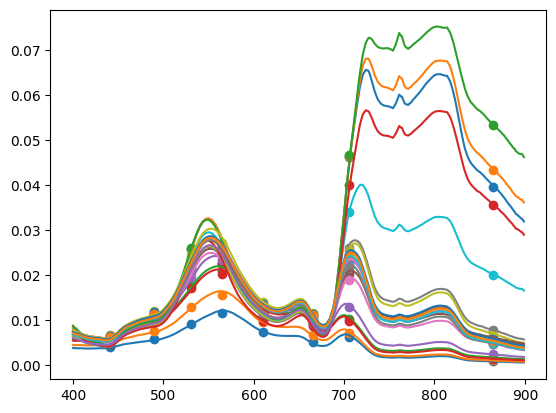

In [8]:
#plot de pontos da radiometria

fig, ax = plt.subplots()

for i in range(len(radiometria)):
  ax.plot(radiometria.columns, radiometria.iloc[i])
  
for y in range(len(SD_simulated)):
  ax.scatter(SD_simulated.columns, SD_simulated.iloc[y])

# Personalizar gráfico
#ax.set_xlabel('')
#ax.set_ylabel('')
#ax.legend(loc='upper left')

# Mostrar gráfico
plt.show()


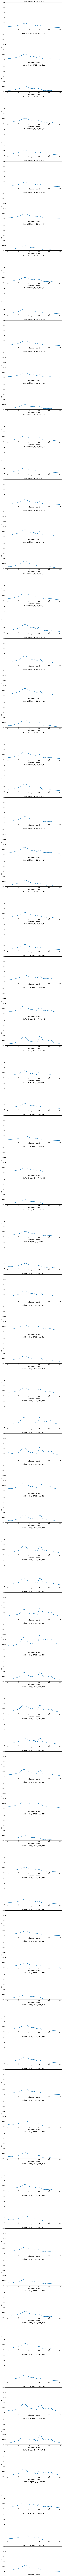

In [18]:
import matplotlib.pyplot as plt

# Criação dos subplots
fig, axs = plt.subplots(len(radiometria), 1, figsize=(8, len(radiometria) * 4))

# Itera sobre as linhas da tabela e cria um gráfico separado para cada linha
for i, row in enumerate(radiometria.iterrows()):
    index, data = row
    axs[i].plot(radiometria.columns, data)
    axs[i].set_xlabel('comprimento de onda')
    axs[i].set_ylabel('rrs')
    axs[i].set_ylim([0, 0.05])
    axs[i].set_title(f'Gráfico {index}')

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Mostra os gráficos
plt.show()